# Linear separation

In [1]:
import warnings
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import numpy as np

from linsepy.linsepy import LinearSeparation

%matplotlib inline

matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['figure.figsize'] = 10, 10

In [2]:
def plot_segment(end_points, plt, c='black'):
    A = end_points[0]
    B = end_points[1]
    plt.plot((A[0], B[0]), (A[1], B[1]), color=c)

In [3]:
def plot_line_implicit(line, plt, c='black'):
    a, b, c = line['a'],  line['b'],  line['c']
    axes = plt.gca()
    xlim = axes.get_xlim()
    ylim = axes.get_ylim()
    bounds = (
        max(xlim[0], ylim[0], key=abs),
        max(xlim[1], ylim[1], key=abs)
    )
    end_points = []
    for e in bounds:
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            x = (-b * e - c ) / a 
            y = (-a * e - c ) / b
        if x >= bounds[0] and x <= bounds[1]:
            end_points.append((x, e))
        if y >= bounds[0] and y <= bounds[1]:
            end_points.append((e, y))
    plot_segment(end_points, plt)


In [4]:
def visualize(points1, points2):
    separation = LinearSeparation(points1, points2)
    line = separation.separate()

    axes = plt.gca()
    axes.set_aspect('equal', 'datalim')
    plt.scatter(points1[:,0], points1[:,1], color='blue')
    plt.scatter(points2[:,0], points2[:,1], color='red')
    if (line):
        print("Separation line implicitly: ax + by + c = 0")
        print("a = {}\nb = {}\nc = {}".format(line['a'], line['b'], line['c']))
        plot_line_implicit(line, plt)
        plot_segment(separation.segment, plt, c='lime')
    else:
        print("Sets of points are linearly inseparable.")
    axes.add_patch(Polygon(separation.hull1, fill=False, edgecolor='blue'))
    axes.add_patch(Polygon(separation.hull2, fill=False, edgecolor='red'))

## Examples

Separation line implicitly: ax + by + c = 0
a = 0.5892695120916592
b = 0.2995997580631202
c = -0.006560013263032901


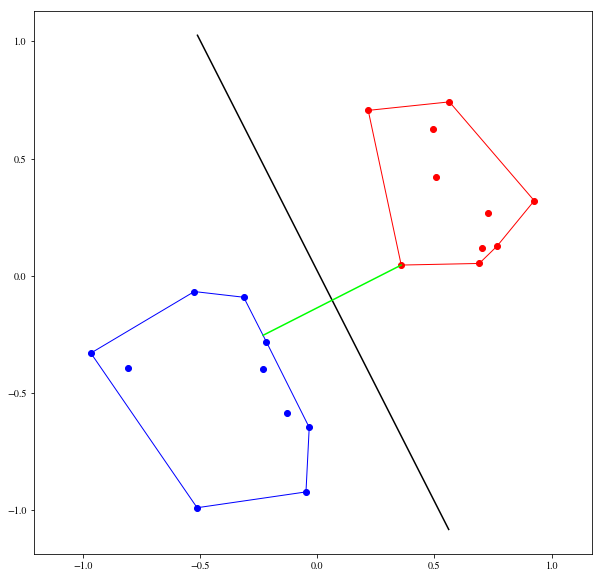

In [5]:
points1 = np.random.rand(10, 2) - 1
points2 = np.random.rand(10, 2)
visualize(points1, points2)

Sets of points are linearly inseparable.


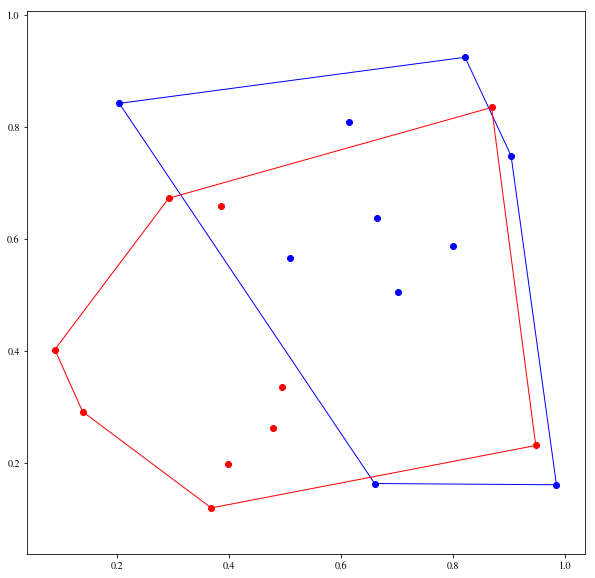

In [6]:
points1 = np.random.rand(10, 2)
points2 = np.random.rand(10, 2)
visualize(points1, points2)

Sets of points are linearly inseparable.


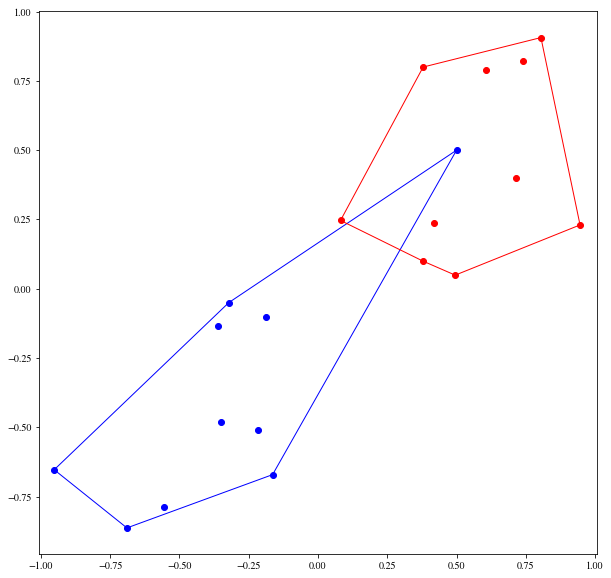

In [7]:
points1 = np.random.rand(10, 2) - 1
points2 = np.random.rand(10, 2)
points1[0] = np.array([0.5, 0.5])
visualize(points1, points2)

Sets of points are linearly inseparable.


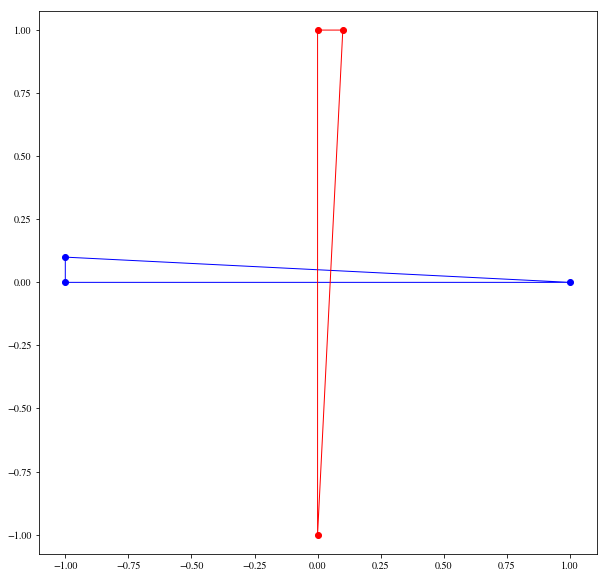

In [8]:
points1 = np.array([[-1, 0], [-1,0.1], [1,0]])
points2 = np.array([[0.,1], [0,-1], [0.1,1]])

visualize(points1, points2)

Separation line implicitly: ax + by + c = 0
a = -1.0
b = 0.0
c = 1.5


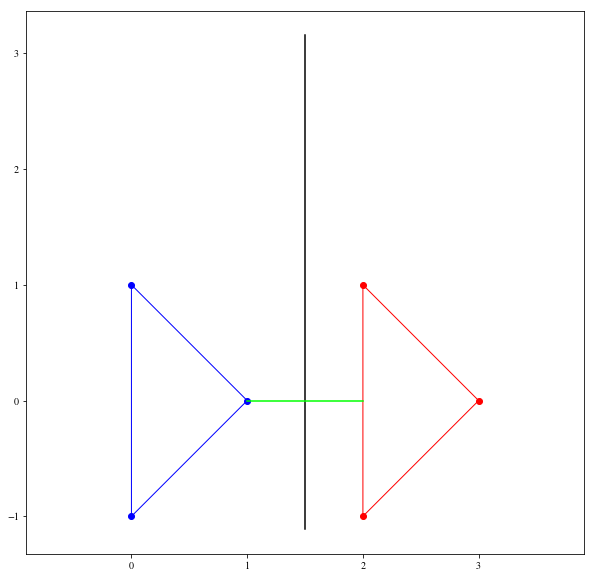

In [23]:
points1 = np.array([[0.,1], [0,-1], [1,0]])
points2 = np.copy(points1)
points2[:, 0] += 2

visualize(points1, points2)

Separation line implicitly: ax + by + c = 0
a = 0.0
b = -1.0
c = 1.5


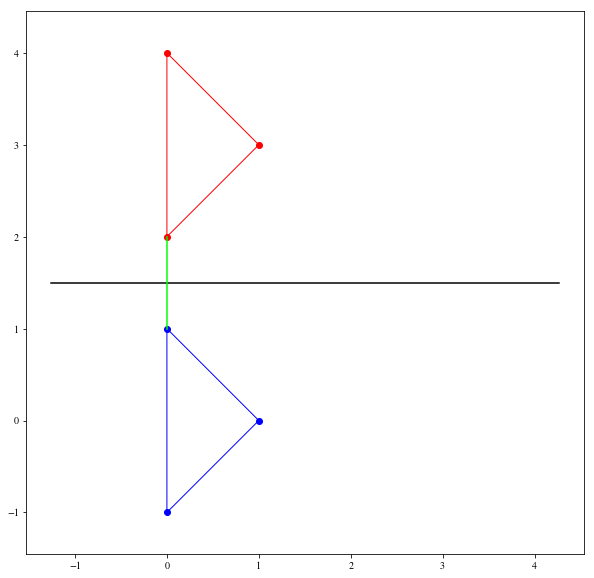

In [10]:
points1 = np.array([[0.,1], [0,-1], [1,0]])
points2 = np.copy(points1)
points2[:, 1] += 3

visualize(points1, points2)

Separation line implicitly: ax + by + c = 0
a = 0.06741465833221083
b = 0.0026745669014730244
c = 0.00017088487961625792


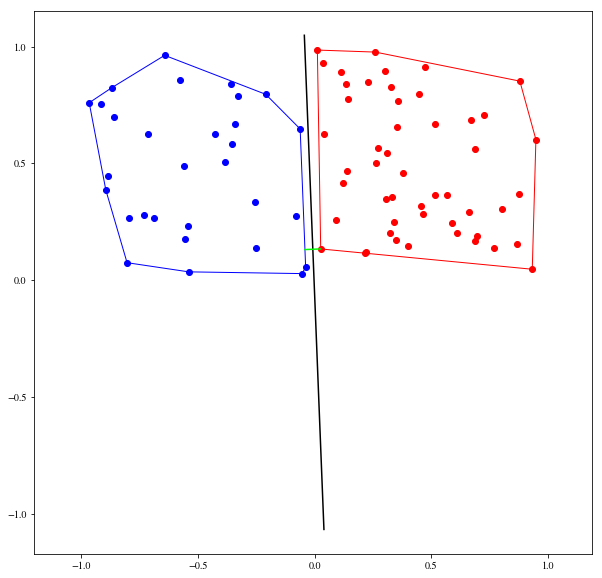

In [11]:
points1 = np.random.rand(30, 2)
points1[:, 0] -= 1 
points2 = np.random.rand(50, 2)
visualize(points1, points2)

Separation line implicitly: ax + by + c = 0
a = -0.005224283725840717
b = 0.0801654747969624
c = 0.00311335262480042


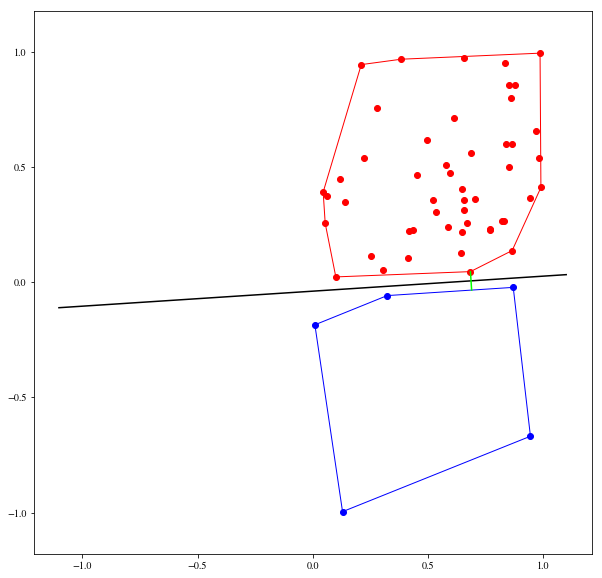

In [12]:
points1 = np.random.rand(5, 2)
points1[:, 1] -= 1 
points2 = np.random.rand(50, 2)
visualize(points1, points2)

Separation line implicitly: ax + by + c = 0
a = -0.015904900814643907
b = -0.023138337307598178
c = -3.307829571503417e-05


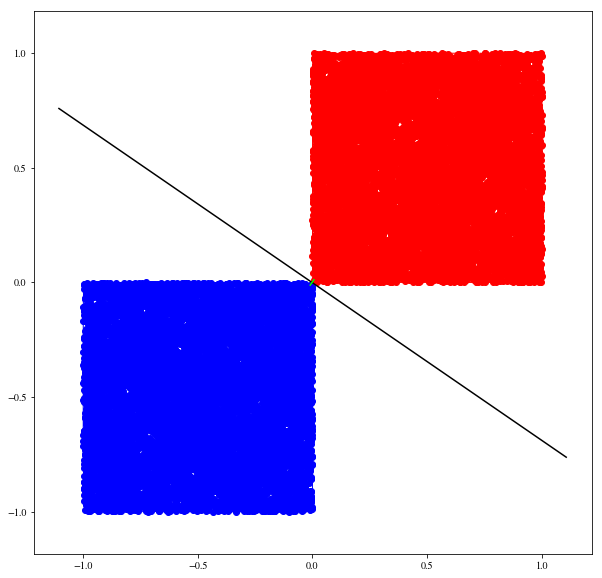

In [13]:
points1 = np.random.rand(10000, 2) - 1
points2 = np.random.rand(10000, 2)
visualize(points1, points2)

Separation line implicitly: ax + by + c = 0
a = 0.00013453023430331674
b = -5.674121172916102e-08
c = 2.5465708606119003e-08


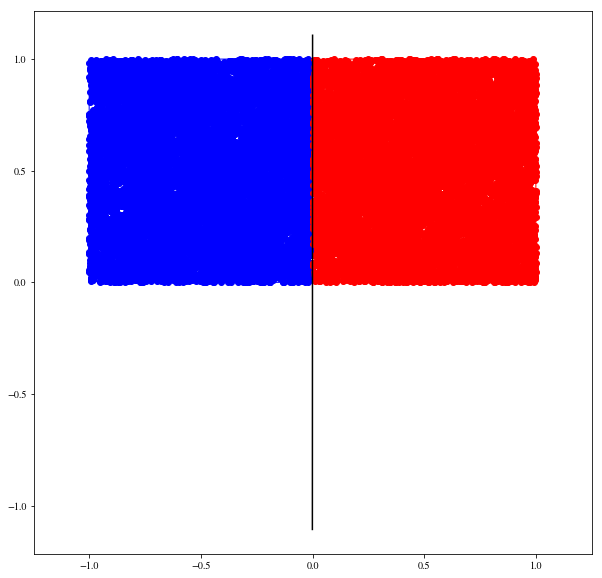

In [14]:
points1 = np.random.rand(10000, 2)
points1[:, 0] -= 1 
points2 = np.random.rand(10000, 2)
visualize(points1, points2)

Sets of points are linearly inseparable.


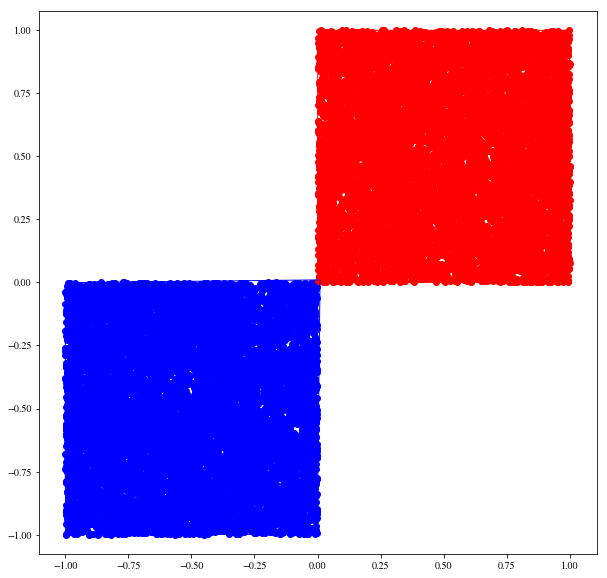

In [15]:
points1 = np.random.rand(10000, 2) - 1
points2 = np.random.rand(10000, 2)
points1[0] = np.array([0.01, 0.01])
visualize(points1, points2)

Separation line implicitly: ax + by + c = 0
a = 0.025116767892161607
b = -0.025473910032934477
c = -0.00024024459171633795


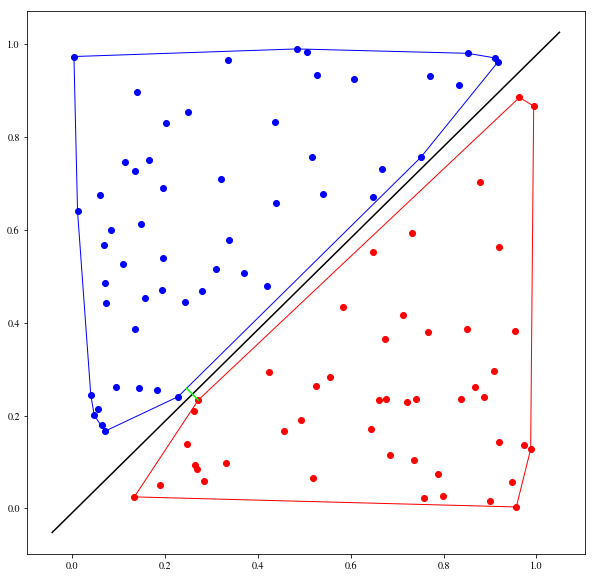

In [16]:
points1 = []
points2 = []
for i in range(100):
    point = np.random.rand(2)
    if point[1] / point[0] > 1:
        points1.append(point)
    else:
        points2.append(point)

visualize(np.array(points1), np.array(points2))

Separation line implicitly: ax + by + c = 0
a = 1.4373096328124113e-05
b = -1.4372553401587052e-05
c = -1.1842306180611544e-10


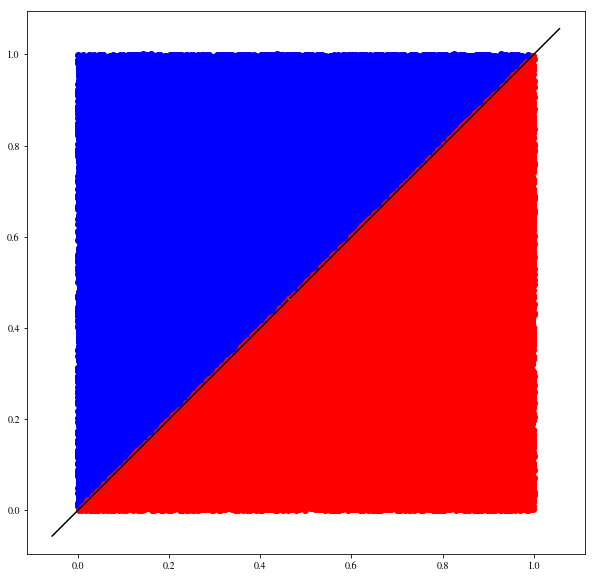

In [17]:
points1 = []
points2 = []
for i in range(100000):
    point = np.random.rand(2)
    if point[1] / point[0] > 1:
        points1.append(point)
    else:
        points2.append(point)

visualize(np.array(points1), np.array(points2))